In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
from scipy.stats import linregress

In [2]:
# data for population from all hurricanes

pop_sandy = "./CleanEconData/Sandy_cln_population.csv"
pop_sandy_df = pd.read_csv(pop_sandy)
pop_sandy_df = pop_sandy_df[['Location','Hurricane','Population','Delta']]

pop_rita = "./CleanEconData/rita_cln_population.csv"
pop_rita_df = pd.read_csv(pop_rita)
pop_rita_df = pop_rita_df[['Location','Hurricane','Population','Delta']]

pop_katrina = "./CleanEconData/katrina_cln_population.csv"
pop_katrina_df = pd.read_csv(pop_katrina)
pop_katrina_df = pop_katrina_df[['Location','Hurricane','Population','Delta']]
# pop_katrina_df = pop_katrina_df.rename(columns = {'NORPOP': 'Population'})

pop_ike = "./CleanEconData/Ike_Pop_df.csv"
pop_ike_df = pd.read_csv(pop_ike)
pop_ike_df = pop_ike_df[['Location','Hurricane','Population','Delta']]


In [3]:
#merge on Delta with value between -4 and 10

pop_merge_df = pd.concat([pop_sandy_df,pop_rita_df, pop_katrina_df,pop_katrina_df,pop_ike_df ])

pop_merge_df = pop_merge_df[pop_merge_df['Delta'].between(-4,7)]

pop_merge_df.head()


,Location,Hurricane,Population,Delta
0,Cape May,Sandy,96.402,-4
1,Cape May,Sandy,96.026,-3
2,Cape May,Sandy,97.222,-2
3,Cape May,Sandy,96.522,-1
4,Cape May,Sandy,96.267,0


In [4]:
pop_merge_df = pop_merge_df.pivot_table( values = 'Population', index=['Delta'], columns = 'Hurricane').reset_index()


Text(0, 0.5, 'Population (in thousands)')

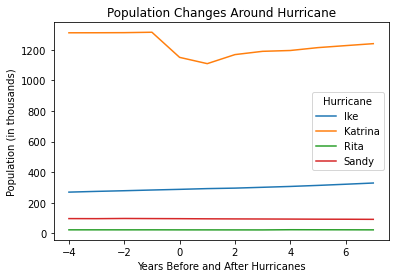

In [6]:
pop_merge_df.plot(x = 'Delta')
plt.title('Population Changes Around Hurricane')
plt.xlabel('Years Before and After Hurricanes')
plt.ylabel('Population (in thousands)')